In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
filename = '/content/drive/My Drive/Bootcamp ML2020/iris.csv'

dataset = pd.read_csv(filename)

In [9]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
dataset = dataset.drop(['Id', 'Species'], axis=1)

In [11]:
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=10)
    kmeans.fit(dataset)
    wcss.append(kmeans.inertia_) # Within cluster sum of squares

print(wcss)

[680.8244, 152.36870647733906, 78.94084142614602, 57.31787321428571, 46.53558205128205, 38.93873974358974, 34.198464618714624, 30.23652404612931, 28.115534535639803, 25.996554473304478]


Text(0, 0.5, 'Inertia')

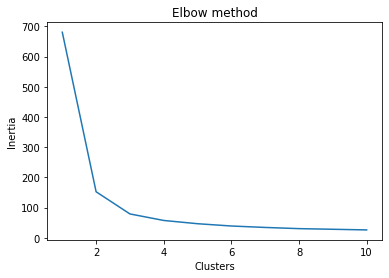

In [13]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow method')
plt.xlabel('Clusters')
plt.ylabel('Inertia')

In [19]:
kmeans = KMeans(n_clusters=3, random_state=10)
model = kmeans.fit(dataset)

In [34]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [20]:
model.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [22]:
y_kmeans = kmeans.predict(dataset)

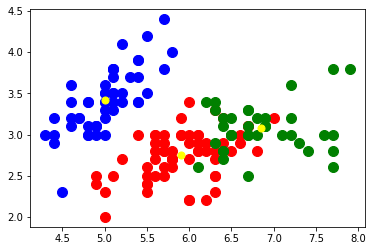

In [23]:
plt.scatter(dataset.values[y_kmeans == 0, 0], dataset.values[y_kmeans == 0, 1], s=100, c='red', label ='Cluster 1') # angka 0, 1, 2 merupakan cluster, dan angka 0 dan 1 setelahnya merujuk ke feature apa yg ingin dibandingkan
plt.scatter(dataset.values[y_kmeans == 1, 0], dataset.values[y_kmeans == 1, 1], s=100, c='blue', label ='Cluster 2')# lanjutan: disini 0 dan 1 itu merujuk ke sepal length dan sepal width
plt.scatter(dataset.values[y_kmeans == 2, 0], dataset.values[y_kmeans == 2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=50, c='yellow', label = 'Centroids')

In [32]:
filename2 = '/content/drive/My Drive/Bootcamp ML2020/customer.csv'

dataset2 = pd.read_csv(filename2)

In [33]:
dataset2.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [35]:
dataset2.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [36]:
gender = pd.get_dummies(dataset2["Genre"])
gender.head()

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0


In [37]:
dataset2 = pd.concat([dataset2, gender], axis=1)

dataset2.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,1,Male,19,15,39,0,1
1,2,Male,21,15,81,0,1
2,3,Female,20,16,6,1,0
3,4,Female,23,16,77,1,0
4,5,Female,31,17,40,1,0


In [39]:
dataset2.drop(['CustomerID', 'Genre'], axis=1, inplace=True)

In [40]:
dataset2.head()

,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


In [41]:
from sklearn.cluster import KMeans
wcss2 = []

for i in range(1, 11):
    kmeans2 = KMeans(n_clusters=i, random_state=10)
    kmeans2.fit(dataset2)
    wcss2.append(kmeans2.inertia_) # Within cluster sum of squares

print(wcss2)

[308911.34, 212938.7150895141, 143440.43314900761, 104463.19922884135, 75448.45165554191, 58396.839405039405, 51213.38152958153, 44734.44301948052, 41364.5424301505, 37145.52735980328]


Text(0, 0.5, 'Inertia')

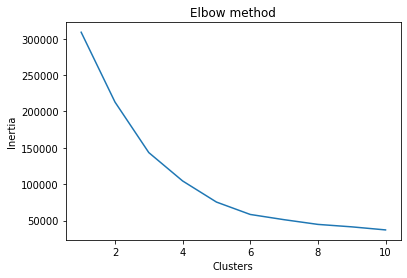

In [42]:
plt.plot(range(1, 11), wcss2)
plt.title('Elbow method')
plt.xlabel('Clusters')
plt.ylabel('Inertia')

In [43]:
kmeans2 = KMeans(n_clusters=6, random_state=10)
model2 = kmeans2.fit(dataset2)

In [44]:
model2.labels_

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 5, 4, 5, 0,
       3, 4, 5, 0, 0, 0, 5, 0, 0, 5, 5, 5, 5, 5, 0, 5, 5, 0, 5, 5, 5, 0,
       5, 5, 0, 0, 5, 5, 5, 5, 5, 0, 5, 0, 0, 5, 5, 0, 5, 5, 0, 5, 5, 0,
       0, 5, 5, 0, 5, 0, 0, 0, 5, 0, 5, 0, 0, 5, 5, 0, 5, 0, 5, 5, 5, 5,
       5, 0, 0, 0, 0, 0, 5, 5, 5, 5, 0, 0, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [45]:
model2.cluster_centers_

array([[27.        , 56.65789474, 49.13157895,  0.65789474,  0.34210526],
       [32.69230769, 86.53846154, 82.12820513,  0.53846154,  0.46153846],
       [41.68571429, 88.22857143, 17.28571429,  0.42857143,  0.57142857],
       [44.14285714, 25.14285714, 19.52380952,  0.61904762,  0.38095238],
       [25.27272727, 25.72727273, 79.36363636,  0.59090909,  0.40909091],
       [56.15555556, 53.37777778, 49.08888889,  0.55555556,  0.44444444]])

In [46]:
y_kmeans2 = kmeans2.predict(dataset2)

**Soal 1**

SepalLengthCm dan PetalLengthCm

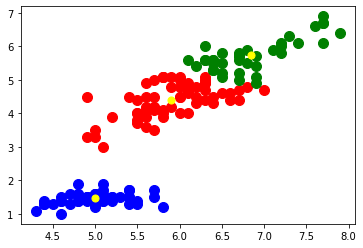

In [25]:
plt.scatter(dataset.values[y_kmeans == 0, 0], dataset.values[y_kmeans == 0, 2], s=100, c='red', label ='Cluster 1') # angka 0, 1, 2 merupakan cluster, dan angka 0 dan 1 setelahnya merujuk ke feature apa yg ingin dibandingkan
plt.scatter(dataset.values[y_kmeans == 1, 0], dataset.values[y_kmeans == 1, 2], s=100, c='blue', label ='Cluster 2')# lanjutan: disini 0 dan 1 itu merujuk ke sepal length dan sepal width
plt.scatter(dataset.values[y_kmeans == 2, 0], dataset.values[y_kmeans == 2, 2], s=100, c='green', label ='Cluster 3')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 2], s=50, c='yellow', label = 'Centroids')

SepalWidthCm dan PetalWidthCm

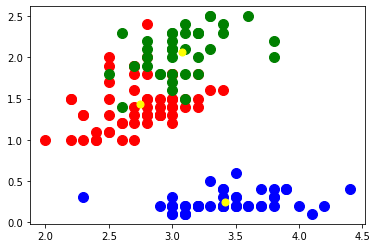

In [30]:
plt.scatter(dataset.values[y_kmeans == 0, 1], dataset.values[y_kmeans == 0, 3], s=100, c='red', label ='Cluster 1') # angka 0, 1, 2 merupakan cluster, dan angka 0 dan 1 setelahnya merujuk ke feature apa yg ingin dibandingkan
plt.scatter(dataset.values[y_kmeans == 1, 1], dataset.values[y_kmeans == 1, 3], s=100, c='blue', label ='Cluster 2')# lanjutan: disini 0 dan 1 itu merujuk ke sepal length dan sepal width
plt.scatter(dataset.values[y_kmeans == 2, 1], dataset.values[y_kmeans == 2, 3], s=100, c='green', label ='Cluster 3')
plt.scatter(model.cluster_centers_[:, 1], model.cluster_centers_[:, 3], s=50, c='yellow', label = 'Centroids')

SepalLengthCm dan PetalWidthCm

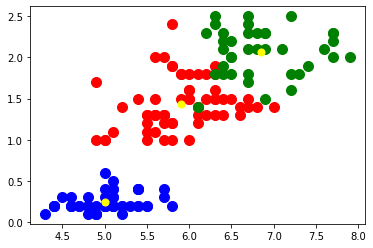

In [31]:
plt.scatter(dataset.values[y_kmeans == 0, 0], dataset.values[y_kmeans == 0, 3], s=100, c='red', label ='Cluster 1') # angka 0, 1, 2 merupakan cluster, dan angka 0 dan 1 setelahnya merujuk ke feature apa yg ingin dibandingkan
plt.scatter(dataset.values[y_kmeans == 1, 0], dataset.values[y_kmeans == 1, 3], s=100, c='blue', label ='Cluster 2')# lanjutan: disini 0 dan 1 itu merujuk ke sepal length dan sepal width
plt.scatter(dataset.values[y_kmeans == 2, 0], dataset.values[y_kmeans == 2, 3], s=100, c='green', label ='Cluster 3')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 3], s=50, c='yellow', label = 'Centroids')

**Soal No 2**

Age dan Annual Income

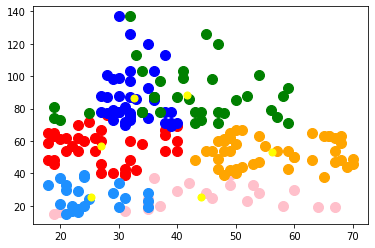

In [47]:
plt.scatter(dataset2.values[y_kmeans2 == 0, 0], dataset2.values[y_kmeans2 == 0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(dataset2.values[y_kmeans2 == 1, 0], dataset2.values[y_kmeans2 == 1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(dataset2.values[y_kmeans2 == 2, 0], dataset2.values[y_kmeans2 == 2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(dataset2.values[y_kmeans2 == 3, 0], dataset2.values[y_kmeans2 == 3, 1], s=100, c='pink', label ='Cluster 4')
plt.scatter(dataset2.values[y_kmeans2 == 4, 0], dataset2.values[y_kmeans2 == 4, 1], s=100, c='dodgerblue', label ='Cluster 5')
plt.scatter(dataset2.values[y_kmeans2 == 5, 0], dataset2.values[y_kmeans2 == 5, 1], s=100, c='orange', label ='Cluster 6')
plt.scatter(model2.cluster_centers_[:, 0], model2.cluster_centers_[:, 1], s=50, c='yellow', label = 'Centroids')

Annual Income dan Spending Score

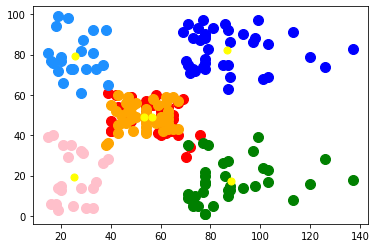

In [48]:
plt.scatter(dataset2.values[y_kmeans2 == 0, 1], dataset2.values[y_kmeans2 == 0, 2], s=100, c='red', label ='Cluster 1')
plt.scatter(dataset2.values[y_kmeans2 == 1, 1], dataset2.values[y_kmeans2 == 1, 2], s=100, c='blue', label ='Cluster 2')
plt.scatter(dataset2.values[y_kmeans2 == 2, 1], dataset2.values[y_kmeans2 == 2, 2], s=100, c='green', label ='Cluster 3')
plt.scatter(dataset2.values[y_kmeans2 == 3, 1], dataset2.values[y_kmeans2 == 3, 2], s=100, c='pink', label ='Cluster 4')
plt.scatter(dataset2.values[y_kmeans2 == 4, 1], dataset2.values[y_kmeans2 == 4, 2], s=100, c='dodgerblue', label ='Cluster 5')
plt.scatter(dataset2.values[y_kmeans2 == 5, 1], dataset2.values[y_kmeans2 == 5, 2], s=100, c='orange', label ='Cluster 6')
plt.scatter(model2.cluster_centers_[:, 1], model2.cluster_centers_[:, 2], s=50, c='yellow', label = 'Centroids')

Age dan Spending Score

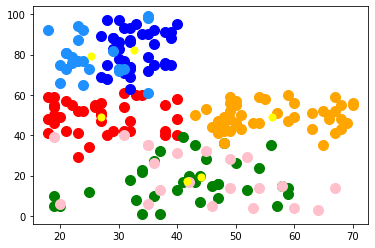

In [50]:
plt.scatter(dataset2.values[y_kmeans2 == 0, 0], dataset2.values[y_kmeans2 == 0, 2], s=100, c='red', label ='Cluster 1')
plt.scatter(dataset2.values[y_kmeans2 == 1, 0], dataset2.values[y_kmeans2 == 1, 2], s=100, c='blue', label ='Cluster 2')
plt.scatter(dataset2.values[y_kmeans2 == 2, 0], dataset2.values[y_kmeans2 == 2, 2], s=100, c='green', label ='Cluster 3')
plt.scatter(dataset2.values[y_kmeans2 == 3, 0], dataset2.values[y_kmeans2 == 3, 2], s=100, c='pink', label ='Cluster 4')
plt.scatter(dataset2.values[y_kmeans2 == 4, 0], dataset2.values[y_kmeans2 == 4, 2], s=100, c='dodgerblue', label ='Cluster 5')
plt.scatter(dataset2.values[y_kmeans2 == 5, 0], dataset2.values[y_kmeans2 == 5, 2], s=100, c='orange', label ='Cluster 6')
plt.scatter(model2.cluster_centers_[:, 0], model2.cluster_centers_[:, 2], s=50, c='yellow', label = 'Centroids')